## Using Group By and Pivot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Group By
Can be used to create a plot for time series data 

In [2]:
# create a DataFrame containing monthly Data for three Persons, where data is incomplete for one person 
from pandas import DataFrame

df: DataFrame = pd.DataFrame({'M': ['jan', 'feb', 'mar', 'jan', 'feb', 'mar', 'jan', 'feb', ],
                              'P': ['eva'] * 3 + ['ed'] * 3 + ['mike'] * 2,
                              'C': np.random.randint(0, 101, 8),
                              'D': np.random.randint(0, 101, 8)})
df

,M,P,C,D
0,jan,eva,78,50
1,feb,eva,2,5
2,mar,eva,38,80
3,jan,ed,50,55
4,feb,ed,49,73
5,mar,ed,28,29
6,jan,mike,92,80
7,feb,mike,73,98


In [3]:
# get info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   M       8 non-null      object
 1   P       8 non-null      object
 2   C       8 non-null      int64 
 3   D       8 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 384.0+ bytes


In [4]:
# get statistics about number columns
df.describe()

,C,D
count,8.000000,8.000000
mean,51.250000,58.750000
std,29.270902,30.499415
min,2.000000,5.000000
25%,35.500000,44.750000
50%,49.500000,64.000000
75%,74.250000,80.000000
max,92.000000,98.000000


In [5]:
# create a df indexed by Month - this will be the x-axis in a plot
dfm = df.set_index('M')
dfm[:5]

,P,C,D
M,,,
jan,eva,78,50
feb,eva,2,5
mar,eva,38,80
jan,ed,50,55
feb,ed,49,73


In [6]:
# show info on index
dfm.index

Index(['jan', 'feb', 'mar', 'jan', 'feb', 'mar', 'jan', 'feb'], dtype='object', name='M')

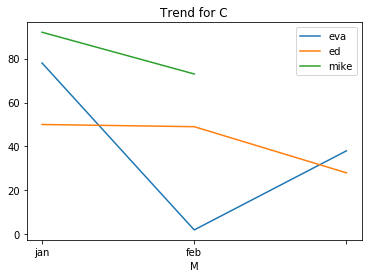

In [7]:
### Plot trend for all P with one Metric C

# groupby yields a DataSeries, plotted as f(y=C,x=M) for all P, with plot arguments:
#  xticks provides labels for xaxis, todo: why is the 'mar' tick missing -incomplete data for mike?
gc = dfm.groupby('P', sort=False)['C']
gc.plot(title='Trend for C', legend=True, x='M', xticks=range(len(gc)));  # subplots=False, use_index=True)

In [8]:
# Grouping info is held in a dict exposed via .groups
gc.groups

{'eva': Index(['jan', 'feb', 'mar'], dtype='object', name='M'),
 'ed': Index(['jan', 'feb', 'mar'], dtype='object', name='M'),
 'mike': Index(['jan', 'feb'], dtype='object', name='M')}

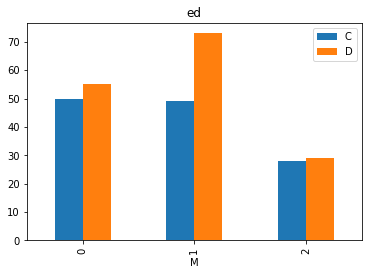

In [9]:
### Plot trend for one P with all Metrics

# The index returned by groupby can be used with the iloc function:
dfm.iloc[gc.indices['ed']].plot(kind='bar', title='ed',xticks=range(len(gc)));

### Pivot Table
Although the former plot can be achieved by groupby there is the more specialized pivot_table which allows for reshaping data and easy plotting 

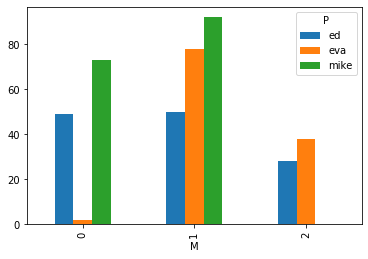

In [10]:
p1=df.pivot_table(index='M',columns=['P'],values='C')
p1.plot(kind='bar',xticks=range(len(p1)));

More complex Dataframes can be reshaped and plotted:

In [11]:
# create a Dataframe containing monthly Data for three Persons with metricName N and metricData D
months = ['jan', 'feb', 'mar']
persons = ['eva'] * 3 + ['ed'] * 3 + ['mike'] * 3
df2 = pd.DataFrame({'M': months * 3 * 2,
                    'P': persons * 2,
                    'N': ['lunch'] * 3 * 3 + ['dinner'] * 3 * 3,
                    'D': np.random.randint(1, 11, 9 * 2)})
df2 = df2.set_index('M')
df2[7:12]

,P,N,D
M,,,
feb,mike,lunch,6
mar,mike,lunch,10
jan,eva,dinner,3
feb,eva,dinner,5
mar,eva,dinner,3


In [12]:
# reshape the Dataframe into 2-dim columns (Person, metricName) with values=metricData and Months as index
p2 = df2.pivot_table(index='M', columns=['P', 'N'], values='D')

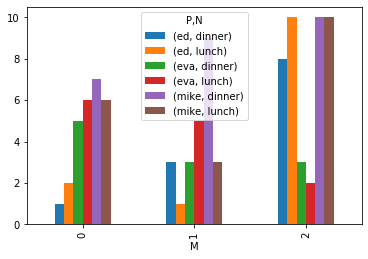

In [13]:
p2.plot(kind='bar', legend=True, xticks=range(len(p2)));